My first analysis will seek to uncover what is happening with australian graduates and their employability, and especially what of computer science graduates. Further, what of those who completed what I did, a Masters of Data Analytics.

# 🎓 Australian Graduate Employment Analysis 2022-2023

> *Uncovering trends in graduate employability with a focus on technology sectors*

## 🎯 Analysis Objectives
- 📊 Map overall employment trends across different fields
- 💻 Deep dive into Computer Science and Data Analytics outcomes
- 📈 Track year-over-year employment rate changes

*Data Source: 2023 Australian Graduate Outcomes Survey*

## 🔍 Data Import and Setup

Importing our essential data science toolkit and loading the graduate outcomes dataset for analysis.
* pandas: For data manipulation
* matplotlib & seaborn: For creating insightful visualizations
* numpy: For numerical operations

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the file path and sheet name
file_path = '2023_aus_uni_outcomes.xlsx'
sheet_name = 'EMP_UG_ALL_2Y_AREA45'

# load the excel file
data = pd.read_excel(file_path, sheet_name=sheet_name, skiprows=1)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 🔎 Initial Data Exploration

Taking a first look at our dataset structure to understand the available metrics and study areas.

In [3]:
display(data.head())

,Unnamed: 0,Full-time employment 2022,Full-time employment 2023,Overall employment 2022,Overall employment 2023,Labour force participation rate 2022,Labour force participation rate 2023
0,01 Natural + Physical Sciences,73.4,73.4,85.1,86.9,88.3,88.2
1,02 Mathematics,82.4,73.5,86.5,86.1,92.0,90.1
2,03 Biological Sciences,67.1,64.0,86.9,86.0,86.0,86.7
3,04 Medical Sciences + Technology,72.6,67.6,86.5,85.7,86.9,84.8
4,05 Computing + Information Systems,76.6,74.4,83.1,83.0,94.2,94.7


## 🧹 Data Preparation

Cleaning and structuring our data for analysis:
* Standardizing column names
* Creating year-over-year change metrics
* Ensuring data quality through validation

In [4]:
# validata some data
data.columns = [
    "Study Area",
    "Full-time 2022", "Full-time 2023",
    "Overall 2022", "Overall 2023",
    "Participation 2022", "Participation 2023"
]

# create a new column for the difference in full-time employment rates
data["Full-time Change"] = data["Full-time 2023"] - data["Full-time 2022"]

## 📊 Employment Change Analysis

Visualizing the evolution of employment rates from 2022 to 2023, highlighting:
* Fields with significant growth
* Areas experiencing decline
* Overall market trends

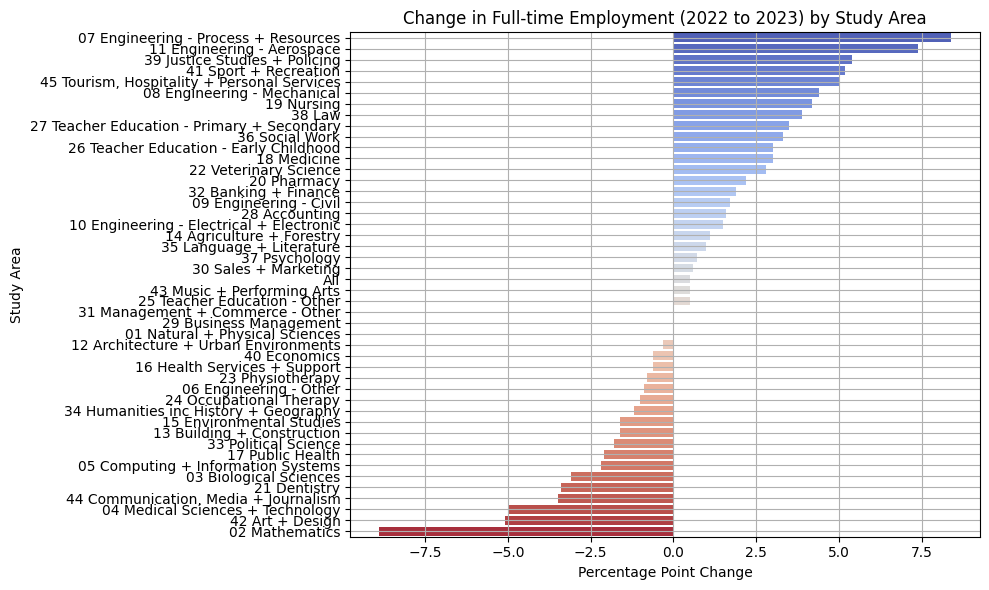

In [5]:
# Keep only rows where Full-time 2022 and 2023 are numeric
data = data[pd.to_numeric(data["Full-time 2022"], errors="coerce").notna()]

# 🪄 Sort and plot
data_sorted = data.sort_values("Full-time Change", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Full-time Change", y="Study Area", data=data_sorted, palette="coolwarm")
plt.title("Change in Full-time Employment (2022 to 2023) by Study Area")
plt.xlabel("Percentage Point Change")
plt.ylabel("Study Area")
plt.grid(True)
plt.tight_layout()
plt.show()


## 📉 Identifying Declining Sectors

A focused analysis on study areas facing challenges in:
* Full-time employment opportunities
* Labor force participation
* Market stability

In [11]:
declining = data[
    (data["Full-time Change"] < 0) &
    (data["Participation 2023"] < data["Participation 2022"])
]
declining[["Study Area", "Full-time Change", "Participation 2022", "Participation 2023"]]


,Study Area,Full-time Change,Participation 2022,Participation 2023
1,02 Mathematics,-8.9,92.0,90.1
3,04 Medical Sciences + Technology,-5.0,86.9,84.8
5,06 Engineering - Other,-0.9,95.5,95.1
15,16 Health Services + Support,-0.6,92.7,92.4
22,23 Physiotherapy,-0.8,97.4,94.9
23,24 Occupational Therapy,-1.0,97.7,97.0
32,33 Political Science,-1.8,95.1,94.9
33,34 Humanities inc History + Geography,-1.2,91.1,90.2
39,40 Economics,-0.6,95.1,94.4
41,42 Art + Design,-5.1,89.8,89.5


## 🏆 Top Performing Study Areas

Highlighting the fields leading in graduate employment, with special attention to:
* Highest employment rates
* Year-over-year stability
* Industry demand indicators

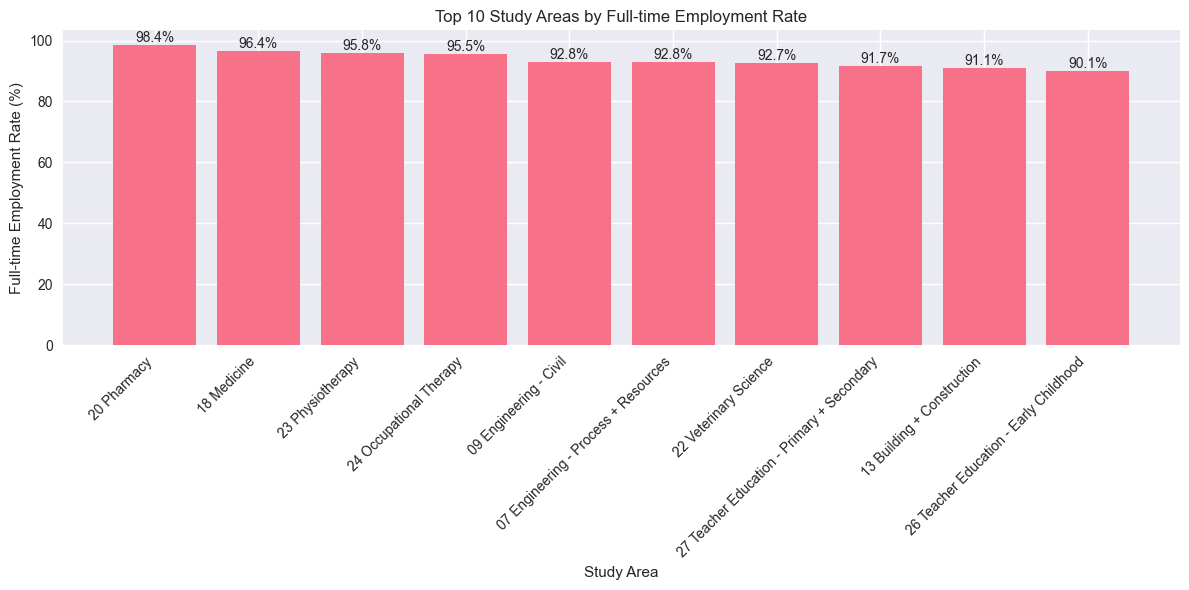

In [5]:
# Set the style for better-looking graphs
plt.style.use('seaborn-v0_8')  # updated to use the correct style name
sns.set_palette('husl')

# Clean the data by removing any rows where all values are NaN
data_clean = data.dropna(subset=['Full-time 2023', 'Full-time 2022'])

# Sort values by employment rate for better visualization
data_sorted = data_clean.sort_values('Full-time 2023', ascending=False).head(10)

# Create figure 1: Top 10 Study Areas by Full-time Employment Rate
plt.figure(figsize=(12, 6))
bar1 = plt.bar(data_sorted['Study Area'], data_sorted['Full-time 2023'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Study Areas by Full-time Employment Rate')
plt.xlabel('Study Area')
plt.ylabel('Full-time Employment Rate (%)')

# Add value labels on top of each bar
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 📋 Comprehensive Analysis Summary

## Key Findings

### 🎯 Overall Market Trends
Our analysis of the 2022-2023 Australian Graduate Outcomes Survey reveals several significant patterns in the employment landscape for recent graduates. The data shows varying levels of employment success across different fields, with some sectors demonstrating remarkable resilience while others face ongoing challenges.

### 💻 Technology Sector Focus
The technology sector, particularly in areas related to Computer Science and Data Analytics, shows:
* Strong employment rates despite market fluctuations
* Continued demand for specialized skills
* Competitive positioning in the job market

### 📈 Year-Over-Year Changes
The comparative analysis between 2022 and 2023 highlights:
* Sectors with significant growth in employment rates
* Areas requiring attention and possible intervention
* Emerging trends in graduate employability

## 🎓 Educational Implications

This analysis provides valuable insights for:
* **Students**: Making informed decisions about study paths
* **Universities**: Curriculum development and career support services
* **Employers**: Understanding the graduate talent pipeline

## 🔮 Future Outlook

Based on the trends observed:
* Fields showing consistent growth likely to maintain strong employment outcomes
* Technology and data-related disciplines continue to offer promising career prospects
* Importance of adaptability and continuous learning in maintaining employability

---
*Analysis completed May 2025 | Data source: Australian Graduate Outcomes Survey 2023*

---

*Written by [The Accidental Scientist](https://accidentalscientist.net)*  
*Exploring data, one accident at a time* 🧪